## Section 1. Import Libraries



In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import warnings

In [ ]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Section 2. Load Dataset

In [ ]:
# TO DO: Read CSV file
df = pd.read_csv('https://raw.githubusercontent.com/MAminK80/ML_HW4/main/AirlineSatisfaction.csv')
# TO DO: Display first few rows of the dataframe
print(df.head(1))

   Unnamed: 0     id  Gender   Customer Type  Age   Type of Travel Class  \
0           0  19556  Female  Loyal Customer   52  Business travel   Eco   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              160                      5                                  4   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              4               3                4   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             3                       5                 5                 5   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 5                2                 5            5   

   Departure Delay in Minutes  Arrival Delay in Minutes satisfaction  
0                          50                      44.0    satisfied  


## Section 3. EDA

(25976, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 n

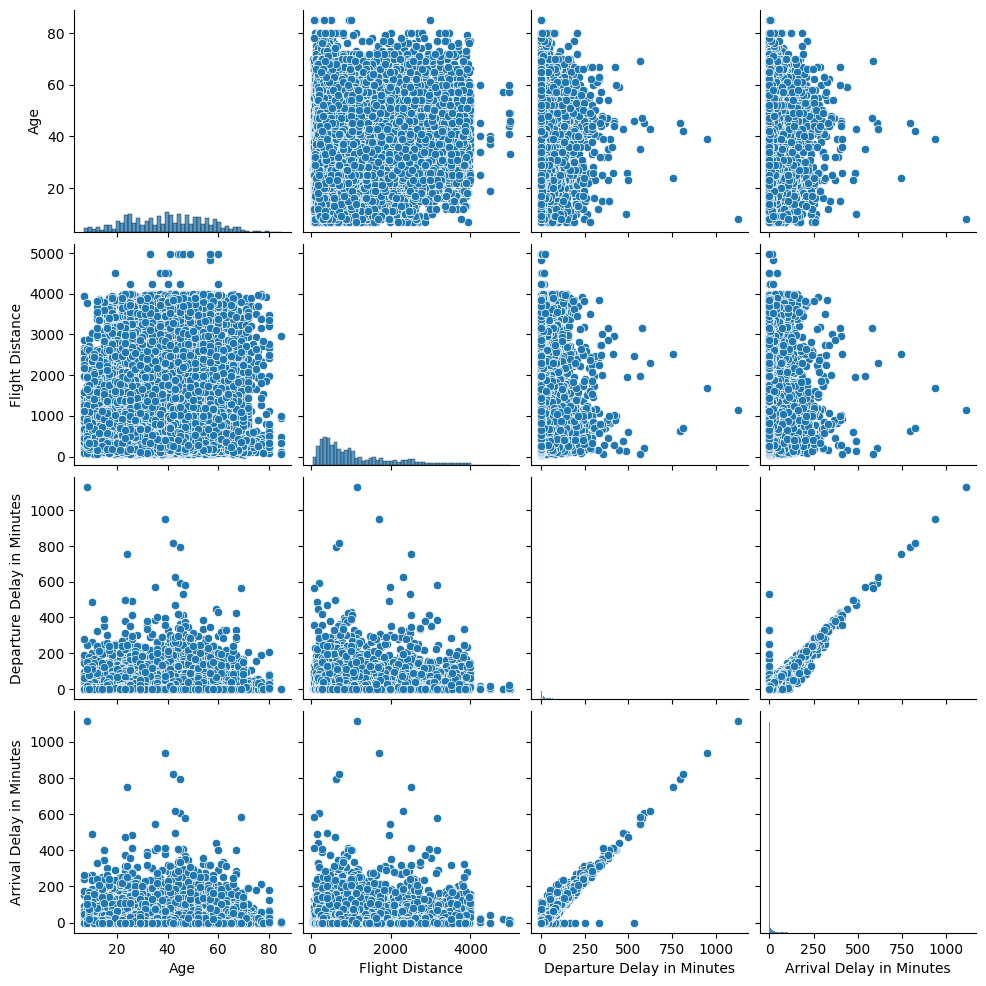

In [ ]:
# TODO: Print the shape of the data
print(df.shape)

# TODO: Print the information about the dataframe
print(df.info())
# TODO Display the summary statistics of the dataframe
print(df.describe())
# Removing unnecesary columns

df=df.drop(['Unnamed: 0','id','Gender', 'Customer Type','Type of Travel', 'Class', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness','satisfaction'],axis=1)

# TODO: Replace any NaN values in the dataframe with 0
new_df = df.fillna(0, inplace=False)
# TODO: Print the number of NaN values in each column of the dataframe
nan_values = df.isna().sum()
print(nan_values)
# TO DO: Create a pairplot using Seaborn library
sns.pairplot(new_df)
plt.show()

## Section 5. Model Building | Training

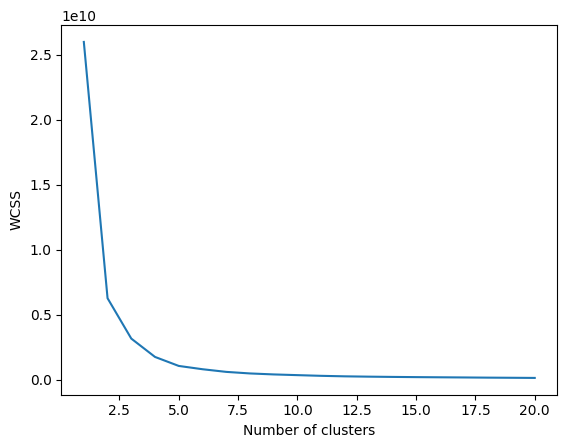

In [ ]:
# TO DO: Implement the elbow method to determine the optimal number of clusters
# TO DO: Create a KMeans model for each number of clusters from 1 to 20
# TO DO: Fit the KMeans model to the data and append the within-cluster sum of squares (WCSS) to a list
# TO DO: Plot the WCSS for each number of clusters
wcss = []

for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=20, random_state=10)
    kmeans.fit(new_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 21), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

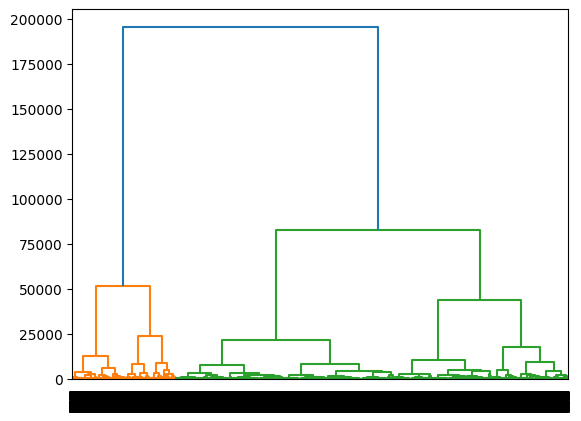

In [ ]:
# TO DO: Create a dendrogram using hierarchical clustering
# TO DO: Use the ward method to calculate linkage
# TO DO: Plot the dendrogram
link = sch.linkage(new_df, method='ward')
dend = sch.dendrogram(link)
plt.show()

## Section 6. K Means Clustering

In [8]:
# TO DO: Create a KMeans model with the best number of clusters
# TO DO: Fit the KMeans model to the data and assign the resulting
# cluster labels to a new column in the dataframe
opc = np.argmin(np.diff(wcss)) + 1

kmeans = KMeans(n_clusters=opc, init='k-means++', max_iter=300, n_init=20, random_state=10)

new_df['Cluster'] = kmeans.fit_predict(new_df)
print(new_df.to_string())

       Age  Flight Distance  Departure Delay in Minutes  Arrival Delay in Minutes  Cluster
0       52              160                          50                      44.0        0
1       36             2863                           0                       0.0        0
2       20              192                           0                       0.0        0
3       44             3377                           0                       6.0        0
4       49             1182                           0                      20.0        0
5       16              311                           0                       0.0        0
6       77             3987                           0                       0.0        0
7       43             2556                          77                      65.0        0
8       47              556                           1                       0.0        0
9       46             1744                          28                      14.0        0

## Section 7. Agglomerative Clustering

In [ ]:
# TO DO: Create an Agglomerative Clustering model with the best number of clusters
# using the Euclidean distance metric and ward linkage
from sklearn.metrics import silhouette_score

best_n_clusters = 0
best_silhouette_score = -1

for n_clusters in range(2, 21):
    agg = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = agg.fit_predict(new_df)
    silhouette_avg = silhouette_score(new_df, labels)
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_n_clusters = n_clusters

agg = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward')
labels = agg.fit_predict(new_df)
# TO DO: Fit the Agglomerative Clustering model to the data and assign
# the resulting cluster labels to a new column in the dataframe

linkages = sch.linkage(new_df, method='ward')
wcss = []
for i in range(1, 21):
    clustering = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    clustering.fit(new_df)
    wcss.append(sum(np.min(new_df[:, clustering.labels_ == j], axis=1)) for j in range(i))

op = wcss.index(max(wcss)) + 1

# create an Agglomerative Clustering model with the optimal number of clusters
model = AgglomerativeClustering(n_clusters=op, affinity='euclidean', linkage='ward')

# fit the model to the data and assign the resulting cluster labels to a new column in the DataFrame
new_df['Cluster'] = model.fit_predict(new_df)

## Section 8. Clusters Visualization

In [ ]:
# TO DO: Remove outliers from the dataframe to improve visualization
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
new_df = new_df[~((new_df < (Q1 - 1.5 * IQR)) | (new_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# TO DO: Create a scatter plot with subplots for each clustering method
# TO DO: Plot the data points for each cluster in a different color and label the clusters accordingly